
# Metro Interstate Traffic Volume

This project serves to allow organizations to evaluate my skills. My explanations will be brief so as not to take up too much of your time. This project aims to determine the indicators of heavy traffic on I-94 using the 'Metro Interstate Traffic Volume' dataset by John Hogue. The original dataset can be found at the UCI Machine Learning Repository.

It should be noted that the documentation states that this dataset records only westbound traffic volume for MN DoT ATR station 301, and the data was recorded from October 2, 2012 to September 30, 2018.

In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Importing dataset to data frame
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


The dataset shows hourly Minneapolis St.Paul, MN traffic volume for westbound I-94. This includes weather and holiday features from season 2012-2018.

### Dataset Attributes
1. **holiday** : Categorical - US National holidays plus regional holiday, Minnesota State Fair
2. **temp** : Numeric - Average temp in kelvin
3. **rain_1h** : Numeric - Amount in mm of rain that occurred in the hour
4. **snow_1h** : Numeric - Amount in mm of snow that occurred in the hour
5. **clouds_all** : Numeric - Percentage of cloud cover
6. **weather_main** : Categorical - Short textual description of the current weather
7. **weather_description** : Categorical - Longer textual description of the current weather
8. **date_time** : DateTime - Hour of the data collected in local CST time
9. **traffic_volume** : Numeric - Hourly I-94 ATR 301 reported westbound traffic volume

In [5]:
df.shape

(48204, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


**Dataset contain both categorical and numerical features.**

In [7]:
#Exploring dataset and making new features

df['date_time'] = pd.to_datetime(df['date_time']) #converting into datetime dtype

#extracting new features from 'date_time'
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month
df['Day'] = df['date_time'].dt.dayofweek
df['Hour'] = df['date_time'].dt.hour

#dropping the unwanted column
df = df.drop(columns=['date_time'], axis=1)

In [8]:
df['temp'] = (df['temp']-273.15) #converting temperature to celsius scale
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Day,Hour
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,1,9
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,1,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,1,11
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,1,12
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,3543,2018,9,6,19
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2781,2018,9,6,20
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,2018,9,6,21
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,1450,2018,9,6,22


In [9]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
dtype: object

In [10]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
Year                   0
Month                  0
Day                    0
Hour                   0
dtype: int64

**No null value is present in the data.**

In [11]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [12]:
# Number of unique elements in each columns
for i in df.columns:
    print(i,':',df[i].nunique())

holiday : 12
temp : 5843
rain_1h : 372
snow_1h : 12
clouds_all : 60
weather_main : 11
weather_description : 38
traffic_volume : 6704
Year : 7
Month : 12
Day : 7
Hour : 24


In [13]:
for i in df.columns:
    print(i,':',df[i].unique())

holiday : ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
temp : [15.13 16.21 16.43 ... 32.93 31.26 31.75]
rain_1h : [0.0000e+00 2.5000e-01 5.7000e-01 3.8000e-01 3.0000e-01 2.9000e-01
 4.4000e-01 3.6000e-01 2.1600e+00 3.3900e+00 8.4000e-01 7.6000e-01
 5.1000e-01 6.9000e-01 1.0000e+00 1.2900e+00 1.3400e+00 1.8400e+00
 1.7000e+00 4.7000e-01 1.4100e+00 1.4400e+00 7.0000e-01 3.1800e+00
 6.1000e-01 6.4000e-01 1.0200e+00 5.4200e+00 8.6400e+00 5.7400e+00
 4.9800e+00 3.6500e+00 6.8000e-01 4.6000e-01 4.2000e-01 1.5200e+00
 8.9000e-01 1.4000e+00 1.2190e+01 2.2900e+00 7.5400e+00 6.9400e+00
 1.6380e+01 1.7800e+00 2.5400e+00 9.1400e+00 3.0500e+00 1.6500e+00
 4.4450e+01 3.8100e+00 5.8400e+00 3.5600e+00 7.3700e+00 1.3500e+00
 1.6000e+01 1.0540e+01 1.2700e+00 5.0800e+00 1.9900e+01 2.5320e+01
 2.1420e+01 5.5900e+00 7.1100e+00 5.9700e+00 9.5300e+00 2.0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,8.055870,13.338232,-273.15,-0.99,9.3,18.656,36.92
rain_1h,48204.0,0.334264,44.789133,0.00,0.00,0.0,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.00,0.00,0.0,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.00,1.00,64.0,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.00,1193.00,3380.0,4933.000,7280.00
Year,48204.0,2015.512426,1.893211,2012.00,2014.00,2016.0,2017.000,2018.00
Month,48204.0,6.506037,3.400221,1.00,4.00,7.0,9.000,12.00
Day,48204.0,2.984980,2.005941,0.00,1.00,3.0,5.000,6.00
Hour,48204.0,11.398162,6.940238,0.00,5.00,11.0,17.000,23.00


**The difference is really small for mean and median values in each of the numerical features. So there less chance for occurences of outliers.**

In [15]:
df.describe(include=['O']).T

,count,unique,top,freq
holiday,48204,12,None,48143
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


C:\Users\salma\AppData\Local\Temp\ipykernel_70328\1166239833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


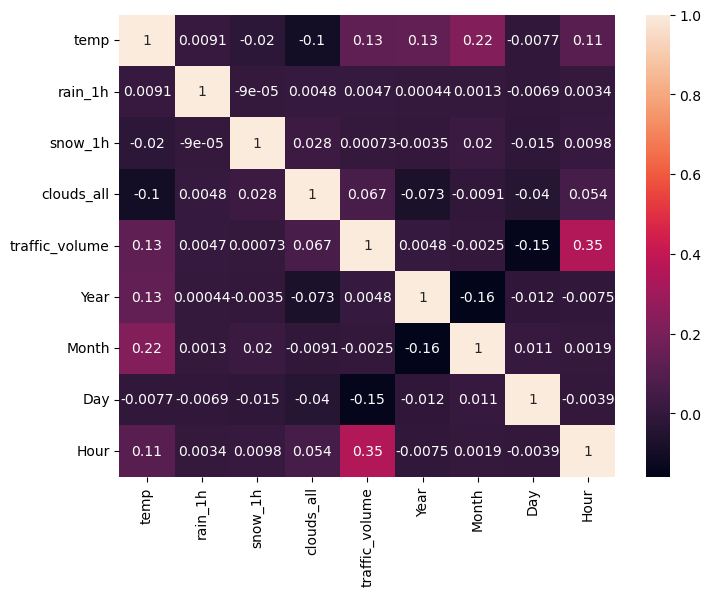

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Correlation between different numeric variables. Plot shows no strong correlation between traffic and other variables**

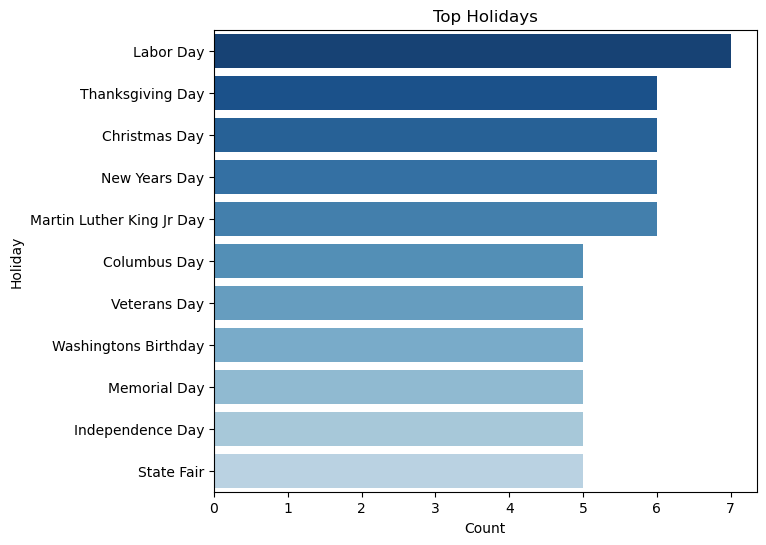

In [17]:
# Plotting frequency of each category in holiday column

holidays = df[df.holiday != 'None'] #'None' is far greater than the other days. So removing 'None' data to visualize the others
top_holidays = holidays['holiday'].value_counts().sort_values(ascending=False)
custom_palette = sns.color_palette("Blues_r", n_colors=15)

plt.figure(figsize=(7, 6))
sns.barplot(y=top_holidays.index, x=top_holidays.values, palette=custom_palette)

plt.xlabel('Count')
plt.ylabel('Holiday')
plt.title('Top Holidays')
plt.show()


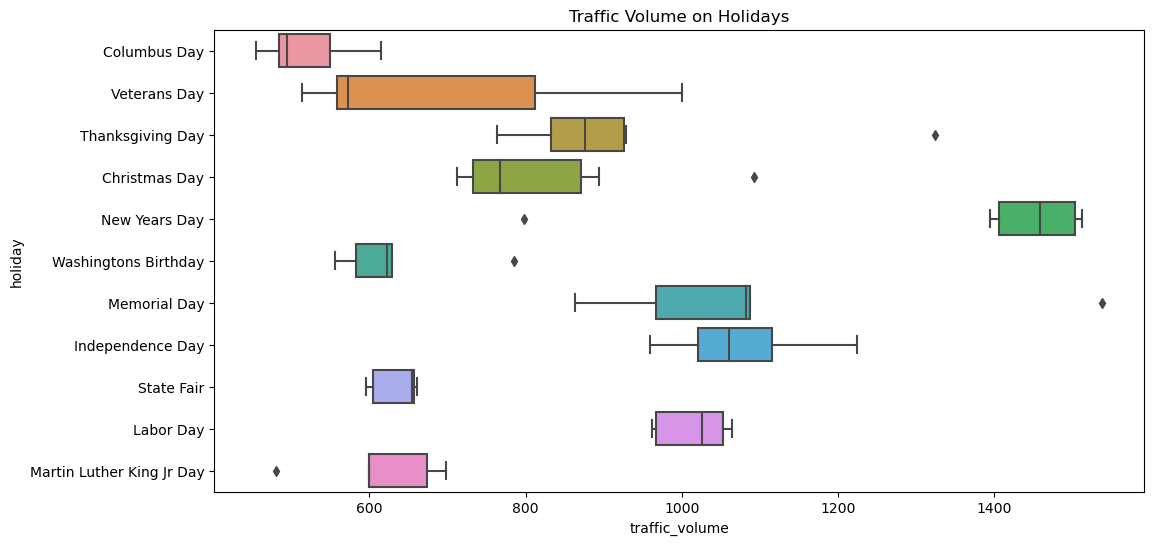

In [128]:
#Exploring the amount of traffic volume on holidays
plt.figure(figsize=(12,6))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.title('Traffic Volume on Holidays')

plt.show()

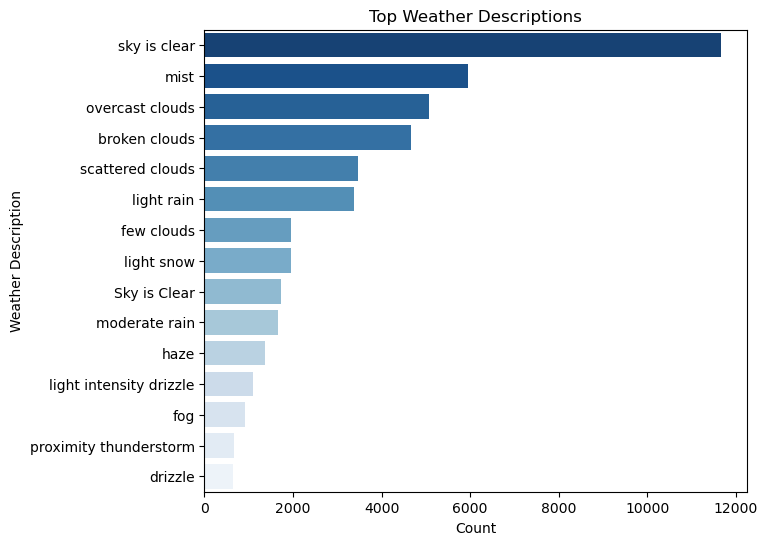

In [19]:
#Exploring different categories in weather_description

top_categories = df['weather_description'].value_counts().sort_values(ascending=False)[:15]
custom_palette = sns.color_palette("Blues_r", n_colors=15) 

plt.figure(figsize=(7, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette=custom_palette)

plt.xlabel('Count')
plt.ylabel('Weather Description')
plt.title('Top Weather Descriptions')
plt.show()

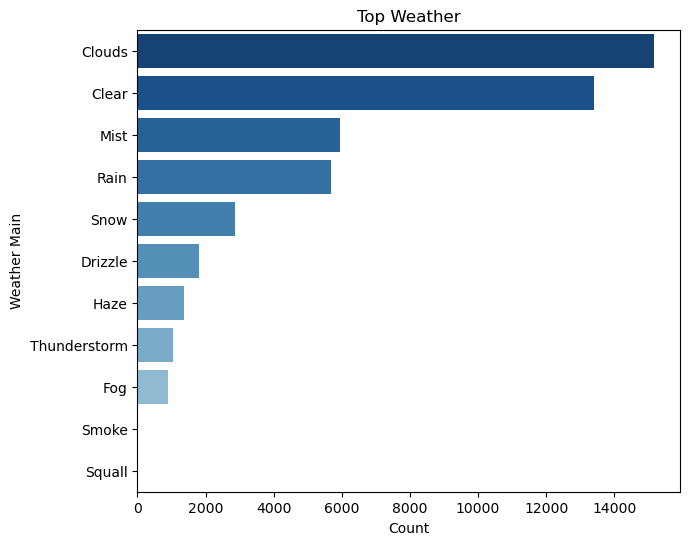

In [20]:
#Exploring different categories in weather_main

top_weather = df['weather_main'].value_counts().sort_values(ascending=False)[:15]
custom_palette = sns.color_palette("Blues_r", n_colors=15) 

plt.figure(figsize=(7, 6))
sns.barplot(y=top_weather.index, x=top_weather.values, palette=custom_palette)

plt.xlabel('Count')
plt.ylabel('Weather Main')
plt.title('Top Weather')
plt.show()

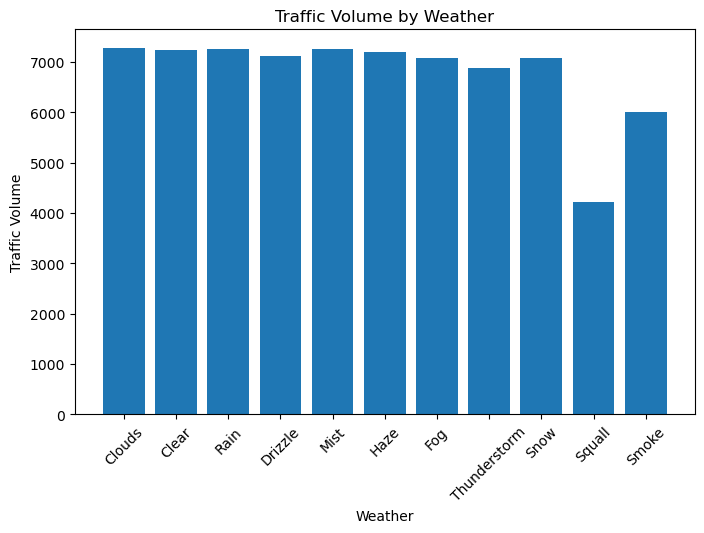

In [21]:
#Plotting weather_main over traffic volume

x = df['weather_main']
y = df['traffic_volume']

plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.xlabel('Weather')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Weather')
plt.xticks(rotation=45)
plt.show()

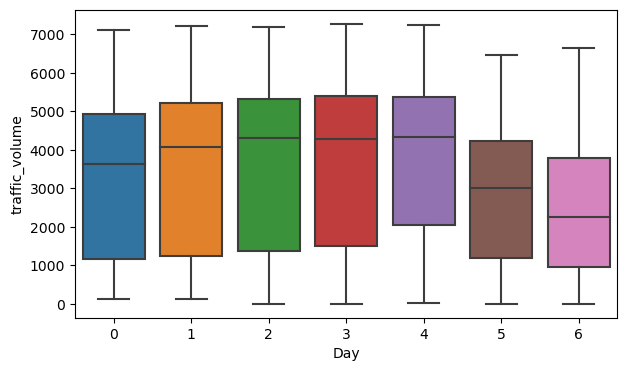

In [22]:
#Traffic volume plotted against weekday

plt.figure(figsize=(7,4))
sns.boxplot(x='Day', y='traffic_volume', data = df)
plt.show()


0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday
- weekends show less traffic volume 

In [23]:
corr = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all','Year','Hour','traffic_volume']].corr()['traffic_volume']
result = pd.DataFrame({'columns': corr.index,'correlation': corr.values})
result

,columns,correlation
0,temp,0.130299
1,rain_1h,0.004714
2,snow_1h,0.000733
3,clouds_all,0.067054
4,Year,0.004753
5,Hour,0.352401
6,traffic_volume,1.000000


We can see that rain_1h and snow_1h has very low correlation with traffic volume

#### Traffic Volume and Temperature

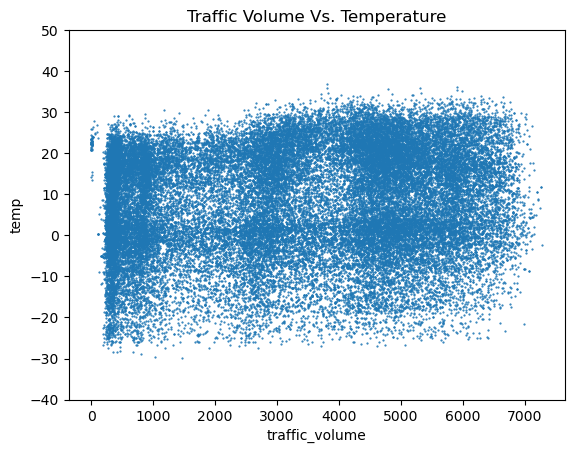

In [24]:
#scatterplot between traffic_volume and temperature

df.plot.scatter('traffic_volume', 'temp', s=0.3)
plt.ylim(-40,50)
plt.title("Traffic Volume Vs. Temperature")
plt.show()

- Temperature had the strongest correlation with the traffic volume, it was visualized with a scatter plot.
- However, this scatter plot shows a tiny correlation with an approximate uniform distribution. 
- So temperature is not a good indicator of traffic volume

#### Traffic Volume

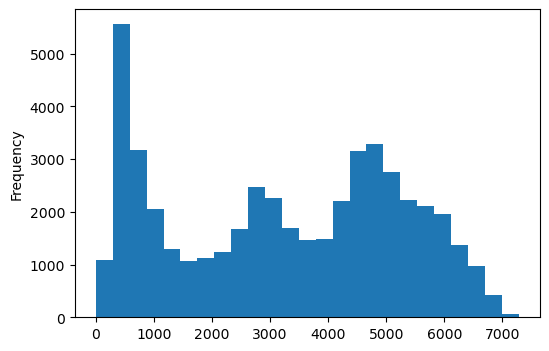

In [25]:
plt.figure(figsize=(6,4))
df['traffic_volume'].plot.hist(bins = 25)
plt.show()

- The hourly traffic volume varied from 0 to around 7,000 cars.
- Most of the time, there were only around 1200 cars or fewer passing the station each hour. 
- And also, the traffic volume was around 5000 or more for some time. 

#### Traffic Volume: Day vs. Night

In [26]:
##The "day" data and the "night" data are then extracted as separated datasets.
##Assumed day starts at 7 am to 7 pm

day_start = 7 
night_start = 19

day_bool = (df.Hour >= day_start) & (df.Hour < night_start)

day = df[day_bool]
night = df[~day_bool]

result = pd.DataFrame({'Day': day.shape,'Night': night.shape})
result.index = ['rows', 'columns']
result

,Day,Night
rows,23877,24327
columns,12,12


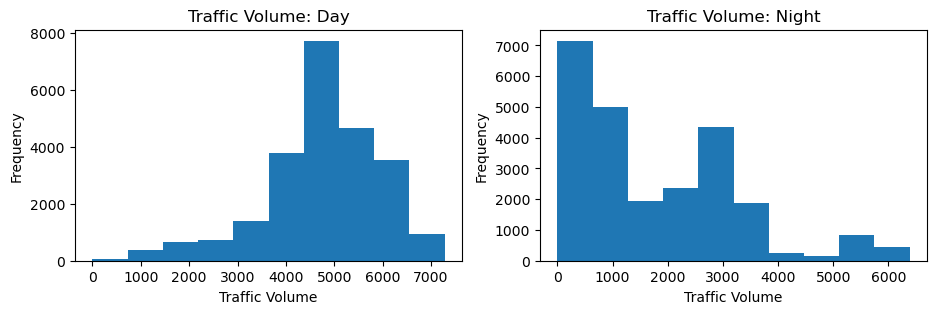

In [27]:
## The separated frequency distributions are plotted and analyzed for day and night
plt.figure(figsize=(11, 3))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

- The distribution during the day is left skewed. This means that most of the traffic volume values are high. 
- It can also be seen that the nighttime data is right skewed. This means that most of the traffic volume values are low.
- Since the project goal is to find indicators of heavy traffic, the remainder of this project will focus on daytime data only.

#### Traffic Volume and Date Time

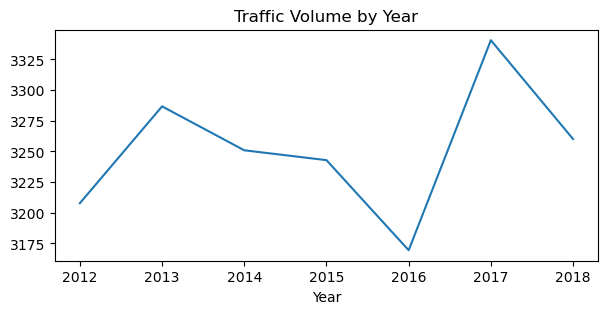

In [28]:
traffic_by_year = df.groupby('Year').agg({'traffic_volume':'mean'})
plt.figure(figsize = (7, 3))
traffic_by_year['traffic_volume'].plot.line()
plt.title('Traffic Volume by Year')
plt.show()

- There is a peak in the year 2017 where average traffic volume was the highest

In [29]:
traffic_by_month = df.groupby('Month').agg({'traffic_volume':'mean'})

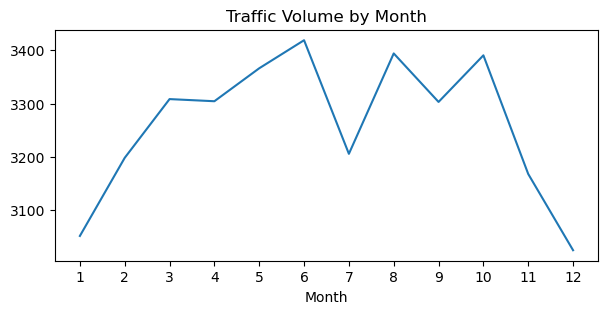

In [30]:
plt.figure(figsize = (7, 3))
traffic_by_month['traffic_volume'].plot.line()
plt.xticks(range(1, 13))
plt.title('Traffic Volume by Month')
plt.show()

- Traffic was less during the cold months (Nov–Feb) and more during warm months (Mar–Oct), with the exception of July

In [31]:
traffic_by_day = df.groupby('Day').agg({'traffic_volume':'mean'})

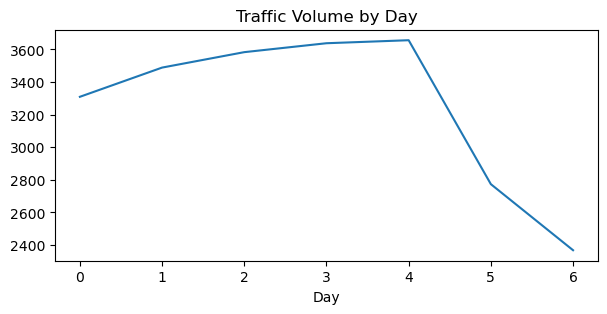

In [32]:
plt.figure(figsize = (7, 3))
traffic_by_day['traffic_volume'].plot.line()
plt.xticks(range(0,7))
plt.title('Traffic Volume by Day')
plt.show()

- Traffic is more during business days (mon - fri) and less on weekends (sat - sun)

In [33]:
weekday = df[df['Day'] <= 4] # 4 is Friday
weekend = df[df['Day'] >= 5] # 5 is Saturday

In [34]:
traffic_by_hour_weekday = weekday.groupby('Hour').agg({'traffic_volume':'mean'})
traffic_by_hour_weekend = weekend.groupby('Hour').agg({'traffic_volume':'mean'})

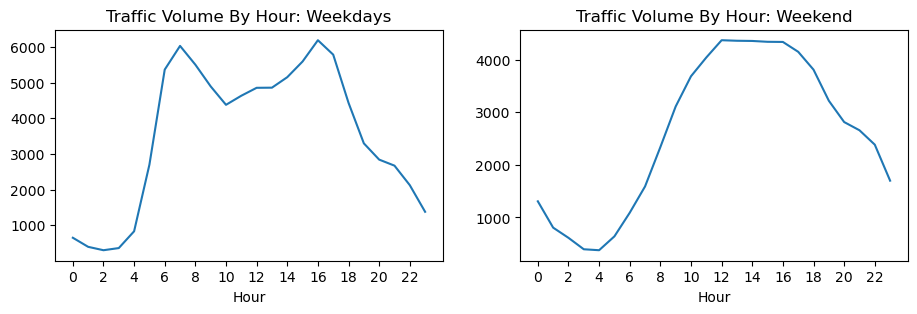

In [35]:
plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
traffic_by_hour_weekday['traffic_volume'].plot.line()
plt.xticks(range(0, 24, 2))
plt.title('Traffic Volume By Hour: Weekdays')

plt.subplot(1, 2, 2)
traffic_by_hour_weekend['traffic_volume'].plot.line()
plt.xticks(range(0, 24, 2))
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

On weekdays, rush hours show the most traffic volume. To summarize, the time-related indicators of heavy traffic are:

- On weekdays, traffic is heaviest during the rush hours.
- The traffic is usually heavier on weekdays.
- The traffic is usually heavier during warm months.

#### Traffic Volume and Weather

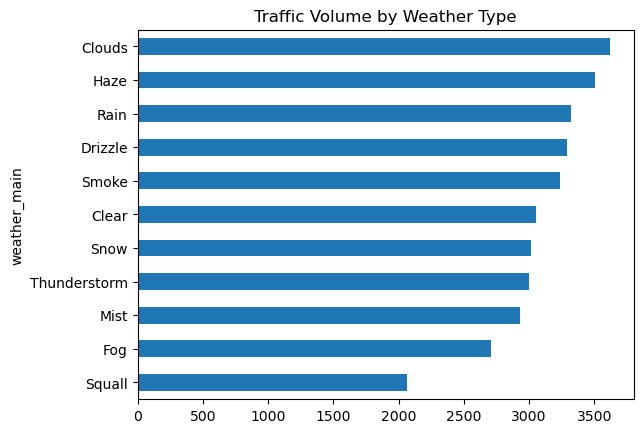

In [36]:
by_weather_main = df.groupby('weather_main').agg({'traffic_volume':'mean'})

travel_by_weather_main = by_weather_main['traffic_volume'].sort_values(ascending=True)
travel_by_weather_main.plot.barh()
plt.title("Traffic Volume by Weather Type")
plt.show()

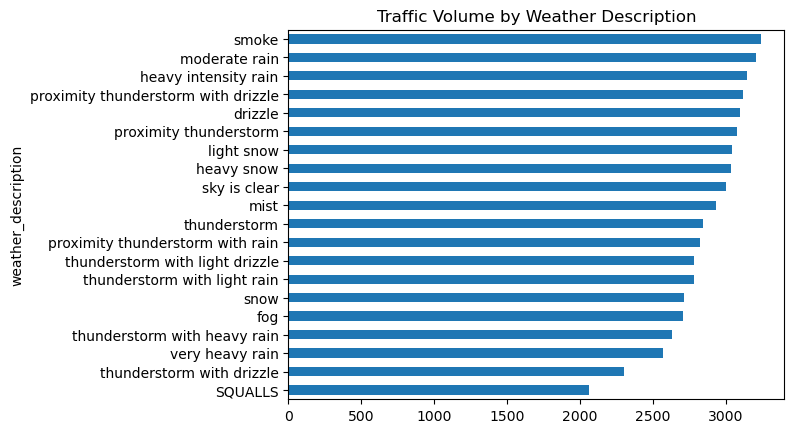

In [116]:
by_weather_description = df.groupby('weather_description').agg({'traffic_volume':'mean'})

travel_by_weather_description = by_weather_description['traffic_volume'].sort_values(ascending=True)[:20]
travel_by_weather_description.plot.barh()
plt.title("Traffic Volume by Weather Description")
plt.show()

- The two largest indicators of high traffic volume are bad weather situations. 
- This may be due to bikers or walkers deciding to drive due to the bad weather.
- We can say that time, not weather, is the primary indicator of traffic volume.

#### Data Preprocessing

In [38]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [39]:
df1=df.copy()

In [40]:
 # Encode holidays as TRUE and non-holidays as FALSE  
conditions = [df1['holiday'] != 'None', df1['holiday'] == 'None'] 

# Define the corresponding values for each condition
values = [True, False]

# Create a new column "is_holiday" based on the conditions and values
df1['is_holiday'] = np.where(np.select(conditions, values), True, False)

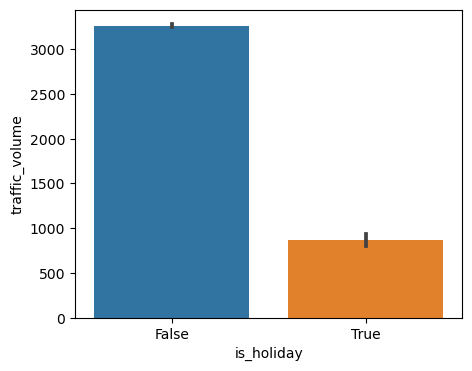

In [41]:
#Traffic volume difference during holiday and non holiday

plt.figure(figsize=(5,4))
sns.barplot(x='is_holiday', y='traffic_volume', data = df1)
plt.show()

In [42]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [43]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [44]:
df1 = df1.drop(columns=['weather_description','holiday'], axis=1)

In [45]:
df1

,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Year,Month,Day,Hour,is_holiday
0,15.13,0.0,0.0,40,Clouds,5545,2012,10,1,9,False
1,16.21,0.0,0.0,75,Clouds,4516,2012,10,1,10,False
2,16.43,0.0,0.0,90,Clouds,4767,2012,10,1,11,False
3,16.98,0.0,0.0,90,Clouds,5026,2012,10,1,12,False
4,17.99,0.0,0.0,75,Clouds,4918,2012,10,1,13,False
...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,0.0,0.0,75,Clouds,3543,2018,9,6,19,False
48200,9.61,0.0,0.0,90,Clouds,2781,2018,9,6,20,False
48201,9.58,0.0,0.0,90,Thunderstorm,2159,2018,9,6,21,False
48202,8.94,0.0,0.0,90,Clouds,1450,2018,9,6,22,False


In [46]:
columns_to_encode = ['is_holiday','weather_main']
df1 = pd.get_dummies(df1, columns=columns_to_encode)
df1

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Year,Month,Day,Hour,is_holiday_False,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,15.13,0.0,0.0,40,5545,2012,10,1,9,1,...,1,0,0,0,0,0,0,0,0,0
1,16.21,0.0,0.0,75,4516,2012,10,1,10,1,...,1,0,0,0,0,0,0,0,0,0
2,16.43,0.0,0.0,90,4767,2012,10,1,11,1,...,1,0,0,0,0,0,0,0,0,0
3,16.98,0.0,0.0,90,5026,2012,10,1,12,1,...,1,0,0,0,0,0,0,0,0,0
4,17.99,0.0,0.0,75,4918,2012,10,1,13,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,0.0,0.0,75,3543,2018,9,6,19,1,...,1,0,0,0,0,0,0,0,0,0
48200,9.61,0.0,0.0,90,2781,2018,9,6,20,1,...,1,0,0,0,0,0,0,0,0,0
48201,9.58,0.0,0.0,90,2159,2018,9,6,21,1,...,0,0,0,0,0,0,0,0,0,1
48202,8.94,0.0,0.0,90,1450,2018,9,6,22,1,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df1.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'Year',
       'Month', 'Day', 'Hour', 'is_holiday_False', 'is_holiday_True',
       'weather_main_Clear', 'weather_main_Clouds', 'weather_main_Drizzle',
       'weather_main_Fog', 'weather_main_Haze', 'weather_main_Mist',
       'weather_main_Rain', 'weather_main_Smoke', 'weather_main_Snow',
       'weather_main_Squall', 'weather_main_Thunderstorm'],
      dtype='object')

In [48]:
df1 = df1.drop(columns=['is_holiday_False','weather_main_Squall'], axis=1)
df1

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Year,Month,Day,Hour,is_holiday_True,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Thunderstorm
0,15.13,0.0,0.0,40,5545,2012,10,1,9,0,0,1,0,0,0,0,0,0,0,0
1,16.21,0.0,0.0,75,4516,2012,10,1,10,0,0,1,0,0,0,0,0,0,0,0
2,16.43,0.0,0.0,90,4767,2012,10,1,11,0,0,1,0,0,0,0,0,0,0,0
3,16.98,0.0,0.0,90,5026,2012,10,1,12,0,0,1,0,0,0,0,0,0,0,0
4,17.99,0.0,0.0,75,4918,2012,10,1,13,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,0.0,0.0,75,3543,2018,9,6,19,0,0,1,0,0,0,0,0,0,0,0
48200,9.61,0.0,0.0,90,2781,2018,9,6,20,0,0,1,0,0,0,0,0,0,0,0
48201,9.58,0.0,0.0,90,2159,2018,9,6,21,0,0,0,0,0,0,0,0,0,0,1
48202,8.94,0.0,0.0,90,1450,2018,9,6,22,0,0,1,0,0,0,0,0,0,0,0


### Feature scaling

In [49]:
target = df1['traffic_volume']
features = df1.drop('traffic_volume', axis = 1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(features)

### Splitting dataset to train and test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size = 0.3, random_state = 1)

In [52]:
X_train.shape

(33742, 19)

In [53]:
X_test.shape

(14462, 19)

## Training with different regressor algorithms

### Linear Regression

In [138]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lin_model = LinearRegression()
lin_model.fit(X_train,y_train) 

LinearRegression()

In [58]:
y_pred_lin = lin_model.predict(X_test)

In [60]:
data_lin = {'Predicted Values': y_pred_lin[:5], 'Actual Values': y_test[:5]}
lin = pd.DataFrame(data_lin)
lin

,Predicted Values,Actual Values
6715,2629.520292,812
27836,1679.114746,1241
43682,3816.612688,1703
41005,3956.221957,5829
28608,4214.373737,3798


In [61]:
lin_model.score(X_train,y_train)

0.16440965027164145

In [62]:
#model.score(X_test,y_test) #test accuracy

In [63]:
accuracy = r2_score(y_test,y_pred_lin)
accuracy

0.1683893230614184

### SVR

In [70]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [71]:
y_pred_svr = svr_model.predict(X_test)

In [73]:
data_svr = {'Predicted Values': y_pred_svr[:5], 'Actual Values': y_test[:5]}
svr = pd.DataFrame(data_svr)
svr

,Predicted Values,Actual Values
6715,3226.611669,812
27836,2619.869436,1241
43682,3302.969541,1703
41005,3765.494777,5829
28608,3581.767541,3798


In [74]:
svr_model.score(X_train,y_train) 

0.11893583118493634

In [75]:
accuracy = r2_score(y_test,y_pred_svr)
accuracy

0.12011393938304105

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [77]:
y_pred_dtr = dtr.predict(X_test)

In [79]:
data_dtr = {'Predicted Values': y_pred_dtr[:5], 'Actual Values': y_test[:5]}
tree = pd.DataFrame(data_dtr)
tree

,Predicted Values,Actual Values
6715,812.0,812
27836,1100.0,1241
43682,2288.0,1703
41005,6248.0,5829
28608,3798.0,3798


In [80]:
dtr.score(X_train,y_train)

0.9999556036563653

In [81]:
accuracy = r2_score(y_test,y_pred_dtr)
accuracy

0.9058520061097252

### Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [83]:
y_pred_rf = rf.predict(X_test)

In [85]:
data_rf = {'Predicted Values': y_pred_rf[:5], 'Actual Values': y_test[:5]}
forest = pd.DataFrame(data_rf)
forest

,Predicted Values,Actual Values
6715,805.73,812
27836,1199.24,1241
43682,2144.31,1703
41005,6011.05,5829
28608,3920.72,3798


In [86]:
rf.score(X_train,y_train)

0.9932496158700574

In [87]:
accuracy = r2_score(y_test,y_pred_rf)
accuracy

0.9504251297898912

### Adaptive Boosting

In [88]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)
abr.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [89]:
y_pred_abr = abr.predict(X_test)

In [91]:
data_abr = {'Predicted Values': y_pred_abr[:5], 'Actual Values': y_test[:5]}
ada = pd.DataFrame(data_abr)
ada

,Predicted Values,Actual Values
6715,530.114943,812
27836,975.050822,1241
43682,2734.846048,1703
41005,4750.821444,5829
28608,4405.212390,3798


In [92]:
abr.score(X_train,y_train)

0.8049187213580147

In [93]:
accuracy = r2_score(y_test,y_pred_abr)
accuracy

0.803214141093895

### XGradient Boosting

In [94]:
import xgboost as xgb
from xgboost import XGBRegressor
xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
y_pred_xg = xg_reg.predict(X_test)

In [97]:
data_xg = {'Predicted Values': y_pred_xg[:5], 'Actual Values': y_test[:5]}
xgb = pd.DataFrame(data_xg)
xgb

,Predicted Values,Actual Values
6715,774.708191,812
27836,1139.141357,1241
43682,2148.830322,1703
41005,5882.693848,5829
28608,3788.184326,3798


In [98]:
xg_reg.score(X_train,y_train)

0.9706162207170532

In [99]:
accuracy = r2_score(y_test,y_pred_xg)
accuracy

0.9572805120419856

#### GridSearch CV

In [100]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

tscv = TimeSeriesSplit(n_splits=3)

param_grid = {'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7], 'n_estimators':np.arange(100,500,100)}

In [101]:
GridSearch = GridSearchCV(estimator = xg_reg, param_grid= param_grid, cv=tscv, n_jobs = 2 )
GridSearch.fit(X_train, y_train)
y_pred_xgcv = GridSearch.predict(X_test)

In [103]:
data_xgcv = {'Predicted Values': y_pred_xgcv[:5], 'Actual Values': y_test[:5]}
xgcv = pd.DataFrame(data_xgcv)
xgcv

,Predicted Values,Actual Values
6715,808.256653,812
27836,1100.761108,1241
43682,2100.005371,1703
41005,5953.578125,5829
28608,3674.997803,3798


In [104]:
print("Best Parameters:",GridSearch.best_params_)
print("Train Score:",GridSearch.best_score_)
print("Test Score:",GridSearch.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 400}
Train Score: 0.9556720562088933
Test Score: 0.9604681070658685


#### Model Consolidation 

In [140]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR' : SVR(),
    'AdaBboost' : AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'XGBoost-CV': XGBRegressor(learning_rate = 0.07, max_depth = 7, n_estimators = 400)
}

In [141]:
data = {}
model_list = []
train_r2_score = []
test_r2_score = []
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Prediction 
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    model_name = list(models.keys())[i]
    model_list.append(model_name)
    print('--------------------------------------------------------------------')
    print()    
    print('Model Name :',model_name)
    print('Training Accuracy: ')
    print('mean_absolute_error: ',mean_absolute_error(y_train,pred_train))
    print('mean_squared_error: ',mean_squared_error(y_train,pred_train)) 
    print('r2_score: ',r2_score(y_train,pred_train))
    print()
    print('Testing Accuracy: ')
   
    print('mean_absolute_error: ',mean_absolute_error(y_test,pred_test))
    print('mean_squared_error: ',mean_squared_error(y_test,pred_test)) 
    print('r2_score: ',r2_score(y_test,pred_test))
    print()
    
    train_r2_score.append(r2_score(y_train,pred_train))
    test_r2_score.append(r2_score(y_test,pred_test))

--------------------------------------------------------------------

Model Name : LinearRegression
Training Accuracy: 
mean_absolute_error:  1590.179911791133
mean_squared_error:  3292966.4955721786
r2_score:  0.16440965027164145

Testing Accuracy: 
mean_absolute_error:  1592.2799065514992
mean_squared_error:  3295645.6395244724
r2_score:  0.1683893230614184

--------------------------------------------------------------------

Model Name : Ridge
Training Accuracy: 
mean_absolute_error:  1590.1892474632411
mean_squared_error:  3292971.8903424465
r2_score:  0.1644082813485197

Testing Accuracy: 
mean_absolute_error:  1592.2979895156066
mean_squared_error:  3295648.509536849
r2_score:  0.16838859885341906

--------------------------------------------------------------------

Model Name : Lasso
Training Accuracy: 
mean_absolute_error:  1590.5665994646024
mean_squared_error:  3293096.1735518146
r2_score:  0.1643767444803126

Testing Accuracy: 
mean_absolute_error:  1592.6449243693141
mean

In [145]:
data['model'] = model_list
data['train_r2_score'] = train_r2_score
data['test_r2_score'] = test_r2_score

In [146]:
data = pd.DataFrame(data)
data

,model,train_r2_score,test_r2_score
0,LinearRegression,0.164410,0.168389
1,Ridge,0.164408,0.168389
2,Lasso,0.164377,0.168411
3,SVR,0.118936,0.120114
4,AdaBboost,0.816959,0.815594
5,Decision Tree,0.999956,0.905651
6,RandomForest,0.993337,0.951152
7,XGBoost,0.970616,0.957281
8,XGBoost-CV,0.976733,0.960468


<Axes: xlabel='test_r2_score', ylabel='model'>

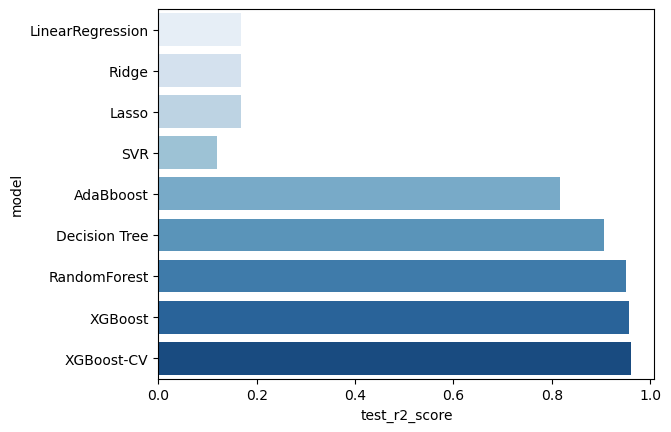

In [150]:
sns.barplot(y='model',x = 'test_r2_score',data=data,orient='h', palette = 'Blues')

#### Highest accuracy is given by XGBoost after parameter tuning, which is 0.960468

### Conclusion
The aim was to look at what factors cause high traffic volumes on the I94-Interstate Highway. We have concluded that time (time of day/ day of week/ month) and weather (description) are the contributors to high traffic volumes from 2012-2018 on the I-94 interstate highway.

- Traffic volumes are higher during the day.
- Traffic volumes are higher from March-October and lower from November-February (July was an exception).
- Business days show higher volumes than weekend days, rush hour appears to be from (7-16).
- The rain_1h and snow_1h has very little correlation with traffic volume
- Traffic volume show weak correlation with temperature (r = 0.13).
- Weather_main was also not a great indicator of traffic volumes.
- The largest indicators of high traffic volume are bad weather situations.
- Different ML algorithms were applied for predicting the traffic volume.
- XGboost algorithm after parameter tuning resulted in the highest accuracy model.

#### Recommendations
- Focus on optimizing traffic management during these peak hours to reduce congestion.
- Promote alternative routes and navigation apps that suggest less congested options during bad weather or high traffic periods.
- Traffic is higher from March to October and lower from November to February. Plan roadwork and maintenance activities accordingly.
- Invest in traffic management strategies and infrastructure development for weekdays.
- Monitor temperature fluctuations and adapt road maintenance accordingly.
- Weather_main is not a strong traffic volume indicator. Focus on creating weather-specific traffic management plans.
